# Homework 7: Dimension Reduction

## The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [1]:
MY_UNIQNAME = 'iviev'

# Download the data:
For this assignment, we will be using a gene expression dataset by Golub et al. (1999).

https://www.kaggle.com/crawford/gene-expression

>This dataset comes from a proof-of-concept study published in 1999 by Golub et al. It showed how new cases of cancer could be classified by gene expression monitoring (via DNA microarray) and thereby provided a general approach for identifying new cancer classes and assigning tumors to known classes. These data were used to classify patients with acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL).

A Kaggle user has [shared a kernel using PCA on this dataset](https://www.kaggle.com/kanav0183/pca-analysis-for-geneclassification), which, among others, you're free to use as a reference.

# Part 0: Loading the Data

As usual, load the data and use the summary functions and plots of your choice to get a sense of the data.

In [44]:
import pandas as pd
import numpy as np
import sklearn.manifold as skm
import sklearn.decomposition as skd
import sklearn.cluster as skc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_context("notebook")  # make figures fit
from pylab import rcParams
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from IPython.display import Image
from IPython.core.display import HTML 
import sklearn as sk
import sklearn.cluster as skc
import sklearn.decomposition as skd
import sklearn.manifold as skm
import sklearn.preprocessing as skp

# make the Pandas tables a little more readable

# from IPython.core.display import HTML
# css = open('style-table.css').read() + open('style-notebook.css').read()
# HTML('<style>{}</style>'.format(css))

In [56]:
# feel free to change the file location 
df_train = pd.read_csv("./data/data_set_ALL_AML_train.csv")
df_test = pd.read_csv("./data/data_set_ALL_AML_independent.csv")

In [57]:
df_train = df_train[[col for col in df_train.columns if "call" not in col]].T
df_test = df_test[[col for col in df_test.columns if "call" not in col]].T


df_train2 = df_train.drop(['Gene Description','Gene Accession Number'],axis=0)
df_test2 = df_test.drop(['Gene Description','Gene Accession Number'],axis=0)

# frames = [df_train2,df_test2]
# df_whole = pd.concat(frames)

# Part 1: MDS

## 1.1. Visualize the gene expression data in 2D or 3D using Multidimensional Scaling  (10 pts.)

In [117]:
### YOUR CODE HERE ###
df_train2.columns = df_train.iloc[1]
df_t2 = df_train2.copy()
df_t2.ix[:,:] = skp.scale(df_t2.ix[:,:].astype(np.float))

df_t2.index = pd.to_numeric(df_t2.index)  #reorders it
df_t2 = df_t2.sort_index(ascending = True)
df_t2.head()





Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-0.861496,-0.033101,-0.351701,-0.805738,-0.168417,-0.888716,1.120068,0.280962,1.863470,0.449110,...,0.074511,-0.815620,-1.758717,-0.021865,-0.405584,-0.159782,-0.033046,0.546068,-0.435820,-0.255875
2,-0.167723,1.037400,0.139139,0.876572,0.114600,0.293351,-1.322502,0.370212,0.023726,-0.182439,...,-0.116640,0.292993,-0.589006,0.092516,0.073055,-0.182892,-0.197260,-0.267043,-0.595744,0.499648
3,0.415047,1.358550,-2.495899,1.100880,-0.907912,-1.577008,0.353591,-1.849884,1.303018,-1.565148,...,1.627617,1.524030,0.317849,-0.498816,1.724361,0.565043,2.130709,0.708690,-0.384366,-0.387270
4,-0.130721,0.488768,2.429729,-1.461407,-1.300484,-1.090715,0.930757,-0.578070,-0.609828,-0.388171,...,0.731595,0.286192,2.749271,-0.485868,-2.152617,-0.508538,-0.800986,-2.251033,-0.526212,-2.029712
5,0.137537,0.341574,-0.506703,-0.115559,0.425006,1.161198,0.219688,0.883400,-0.353970,0.669195,...,-0.271951,-0.346330,0.633277,0.226322,-0.142332,-1.300593,-0.105493,-0.169469,-0.623557,0.138311


In [120]:
df_test2.columns = df_test.iloc[1]
dftest = df_test2.copy()
dftest.ix[:,:] = skp.scale(dftest.ix[:,:].astype(np.float))

dftest.index = pd.to_numeric(dftest.index)  #reorders it
dftest = dftest.sort_index(ascending = True)
dftest.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
39,-2.844380,-0.257223,0.306000,1.238686,0.025884,-0.523312,-1.667952,-1.049687,0.856798,-0.936277,...,1.022196,1.556109,1.104685,-0.613631,-1.506468,1.001512,1.050378,0.909252,-0.394315,-0.784861
40,0.249432,-0.680824,2.043929,0.923680,0.010308,-0.960346,1.338615,-2.535584,1.481976,0.327970,...,-0.858006,-0.164410,-2.826066,-0.043162,-0.316934,-1.568936,-0.026902,-0.587509,-0.819890,0.229552
41,0.552747,1.304804,-0.071469,-0.536801,-0.044209,0.423596,-0.230796,0.761249,-0.777441,-0.630544,...,-0.412185,-0.672903,0.876658,-1.068353,1.117503,-1.114577,-0.529972,1.574480,-0.538290,0.291659
42,1.571885,0.157552,0.117265,0.742313,0.127130,0.648735,0.421656,0.352627,-0.645824,1.724427,...,2.340276,-0.617178,0.550906,0.808408,1.274941,0.539495,0.145869,0.133154,3.423164,-0.205196
43,2.348371,1.190079,-1.125237,0.513218,0.205011,-0.238577,-0.974355,-0.167436,-1.303907,-2.274892,...,1.642469,-1.689890,-0.534937,1.044037,-0.054537,1.412478,-1.317606,0.151633,2.521197,-1.012586


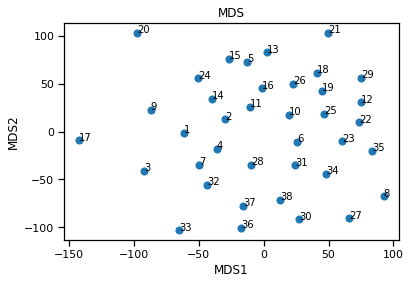

In [122]:
X = skm.MDS(n_components=2).fit_transform(df_t2) #fitting it to normalized data, this is two dimensonal
plt.scatter(X[:,0],X[:,1],s=50)

plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.title('MDS')

for i, s in enumerate(df_t2.index):
    plt.annotate(s, xy=X[i,:2]+0.05, fontsize=10)

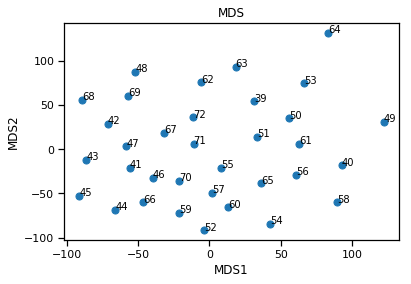

In [123]:
X = skm.MDS(n_components=2).fit_transform(dftest) #fitting it to normalized data, this is two dimensonal
plt.scatter(X[:,0],X[:,1],s=50)

plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.title('MDS')

for i, s in enumerate(dftest.index):
    plt.annotate(s, xy=X[i,:2]+0.05, fontsize=10)

## 1.2. Interprete your results (10 pts.)

What can you see from your visualization(s)?

MDS seeks a low-dimensional representation of the data that preserves the distances in the high-dimensional space. We can see that both datasets are clustered differently.
After running the MDS for the train data, we can see the clusters are more skewed to higher positive values. For the test data, the clusters are more skewed to the less positive side. 

# Part 2: PCA

## 2.1. Perform a Principal Component Analysis of the genes in your dataset (10 pts.)

In [130]:
pca_model = skd.PCA().fit(df_t2.ix[:,:])
pca_model.components_.shape

(38, 7129)

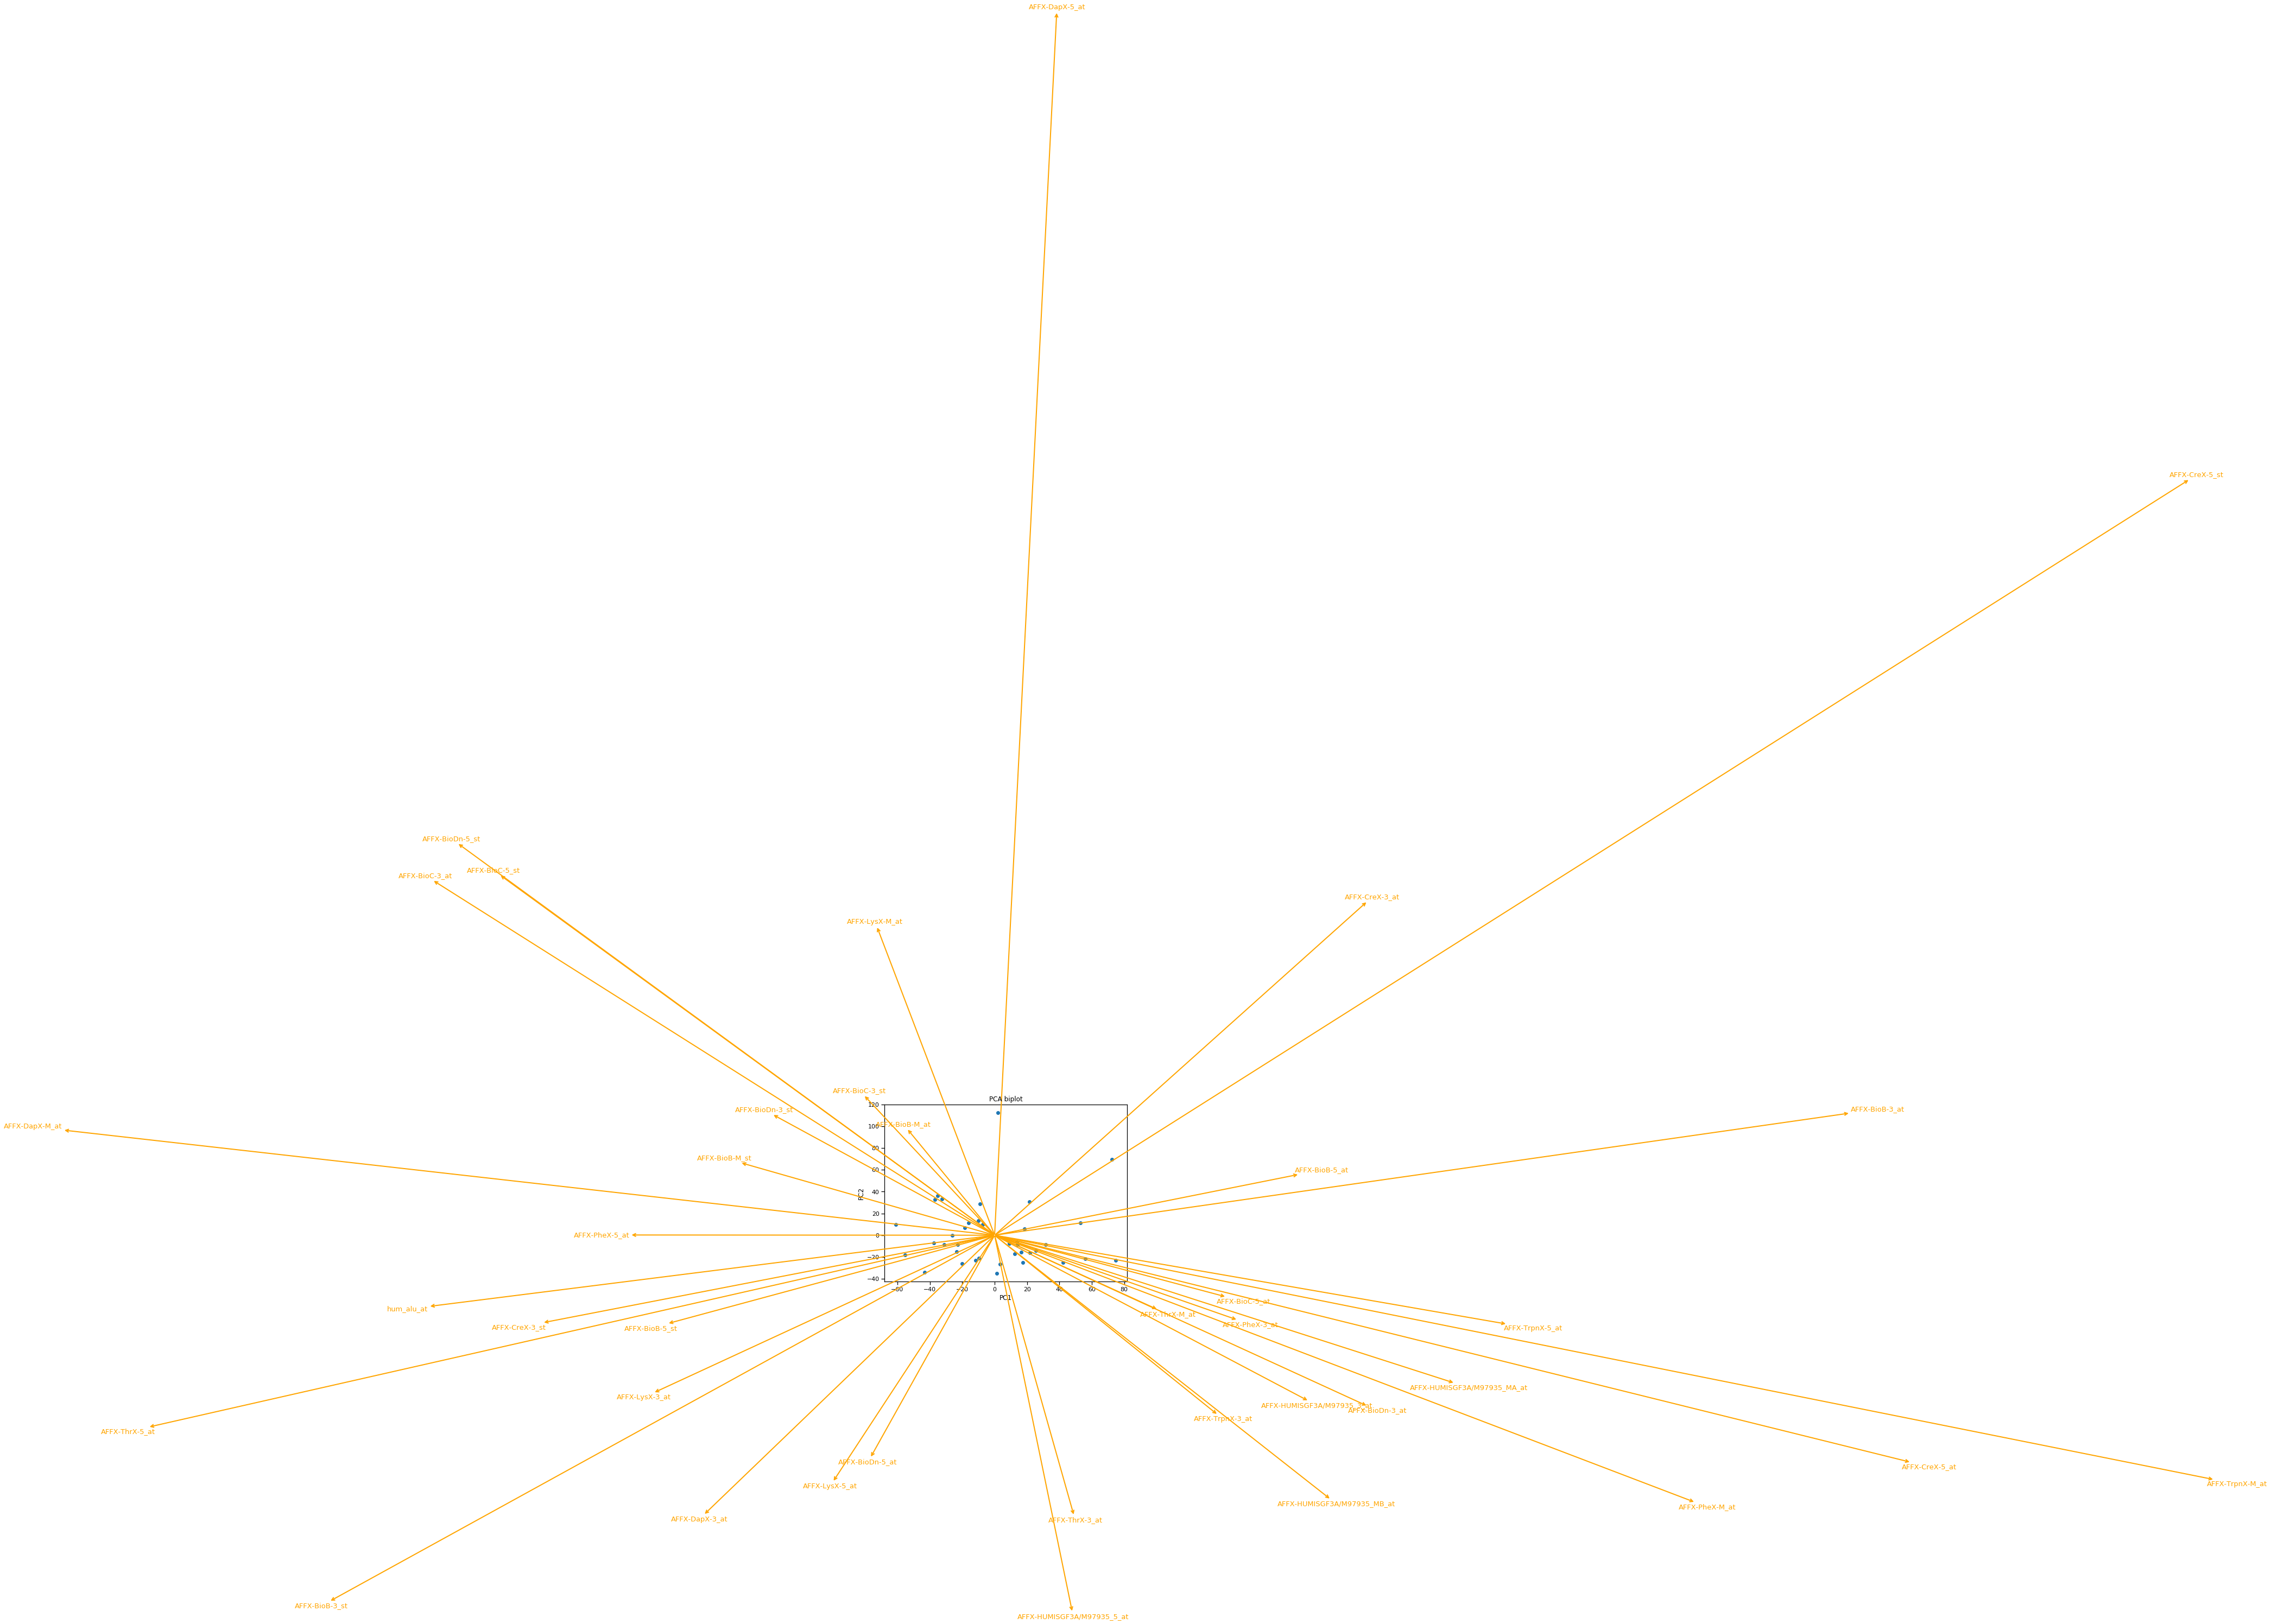

In [131]:
# Scatterplot of disaggregated data
X = pca_model.transform(df_t2.ix[:,:])
plt.figure(figsize=(8,6))
# plt.figure(figsize=(20,20))

plt.scatter(X[:,0], X[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA biplot')
# plt.ylim(-4, 10)

# Add variable unit vector projections
# V = pca_model.transform(np.identity(X.shape[1]))
for i, v in enumerate(X):
    plt.annotate(df_t2.columns[i], 
                 xy=(0,0), xytext=v[:2]*10, 
                 fontsize=13, color='orange',
                 arrowprops=dict(
                    arrowstyle='<-', linewidth=2, color='orange'))

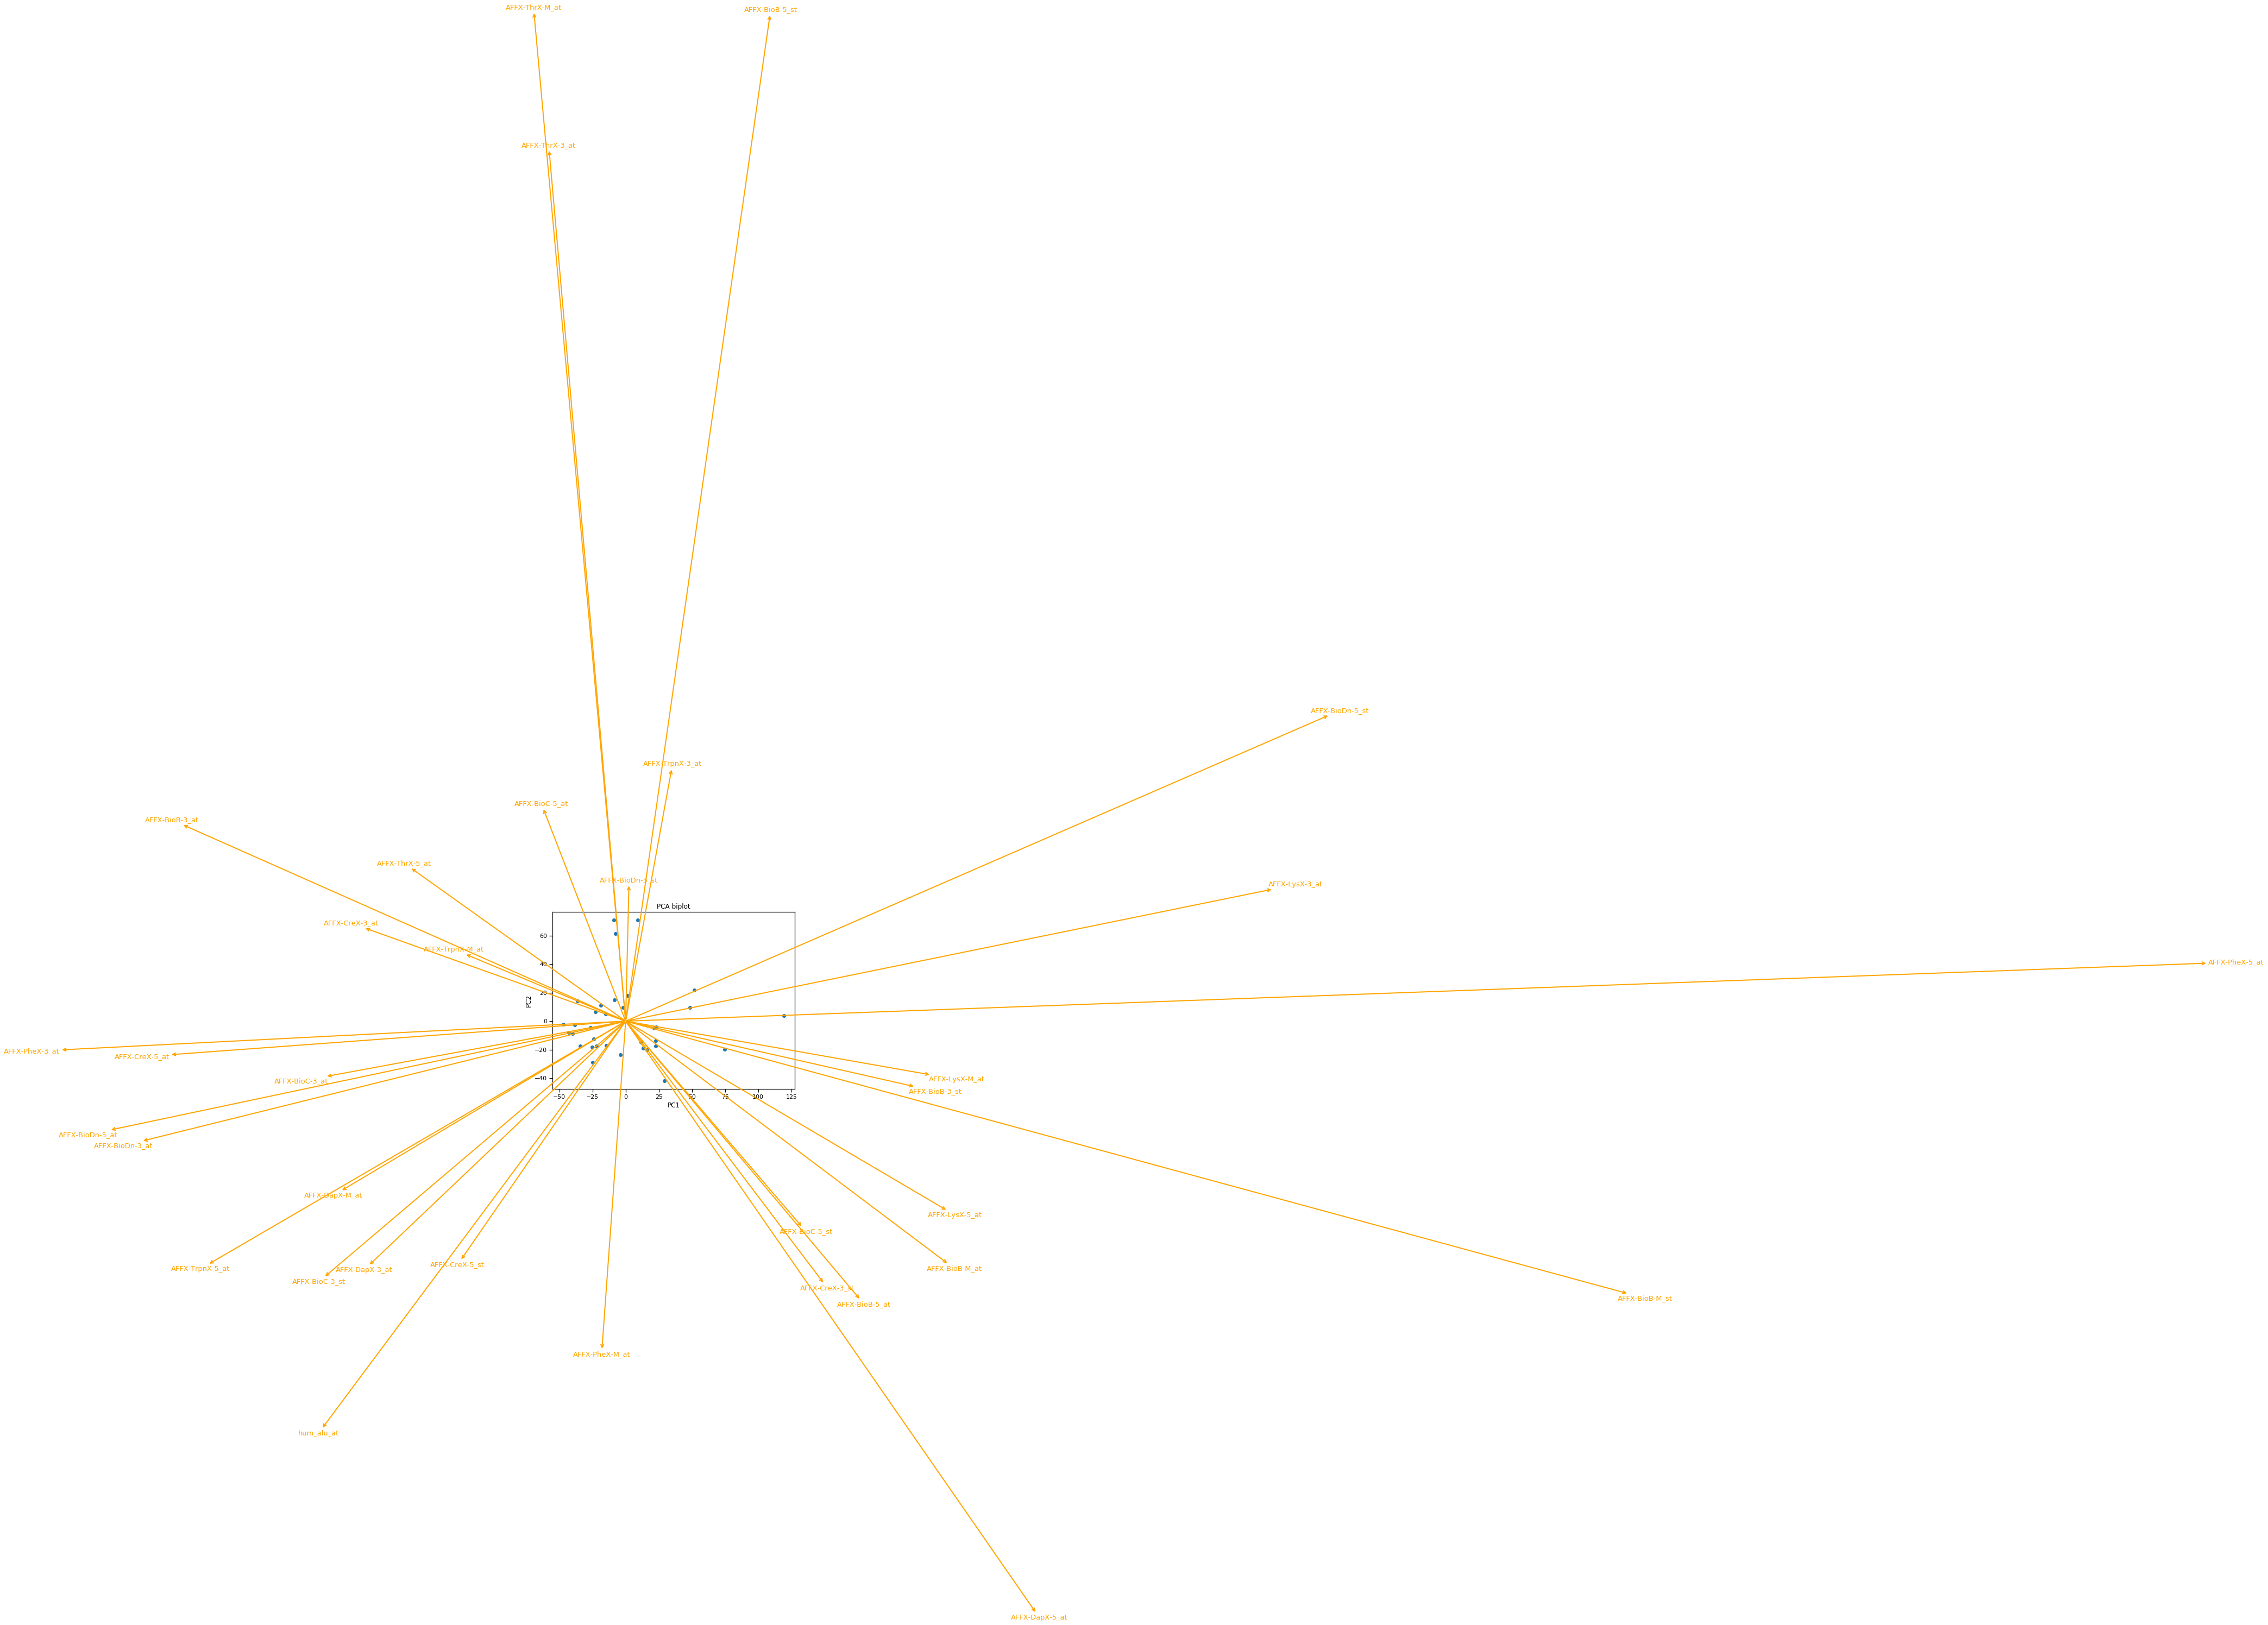

In [132]:
pca_model2 = skd.PCA().fit(dftest.ix[:,:])
pca_model2.components_.shape

# Scatterplot of disaggregated data
X = pca_model2.transform(dftest.ix[:,:])
plt.figure(figsize=(8,6))
# plt.figure(figsize=(20,20))

plt.scatter(X[:,0], X[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA biplot')
# plt.ylim(-4, 10)

# Add variable unit vector projections
# V = pca_model.transform(np.identity(X.shape[1]))
for i, v in enumerate(X):
    plt.annotate(dftest.columns[i], 
                 xy=(0,0), xytext=v[:2]*10, 
                 fontsize=13, color='orange',
                 arrowprops=dict(
                    arrowstyle='<-', linewidth=2, color='orange'))

## 2.2. How much of the variance does each component explain? (2 pts.)

In [133]:
### YOUR CODE HERE ###
pca_model.explained_variance_

array([1.09735759e+03, 8.76976485e+02, 4.83272186e+02, 3.57658145e+02,
       3.39170426e+02, 2.72510227e+02, 2.55597771e+02, 2.40859971e+02,
       2.18576598e+02, 1.93681882e+02, 1.83741623e+02, 1.72634428e+02,
       1.61466953e+02, 1.52866654e+02, 1.42171050e+02, 1.38629132e+02,
       1.35241393e+02, 1.25441555e+02, 1.24851480e+02, 1.20423734e+02,
       1.12430908e+02, 1.11931494e+02, 1.06610477e+02, 1.04779826e+02,
       1.03617441e+02, 1.00934278e+02, 9.86526997e+01, 9.56118071e+01,
       9.54129156e+01, 9.14541425e+01, 8.49250449e+01, 8.17690665e+01,
       7.56789591e+01, 7.30684864e+01, 6.76502725e+01, 6.28995436e+01,
       6.11190279e+01, 2.16415626e-28])

In [140]:
(pca_model.explained_variance_)/(pca_model.explained_variance_.sum())

array([1.49877930e-01, 1.19778111e-01, 6.60056806e-02, 4.88492199e-02,
       4.63241532e-02, 3.72196529e-02, 3.49097368e-02, 3.28968370e-02,
       2.98533570e-02, 2.64532179e-02, 2.50955698e-02, 2.35785408e-02,
       2.20532785e-02, 2.08786432e-02, 1.94178295e-02, 1.89340717e-02,
       1.84713718e-02, 1.71329025e-02, 1.70523096e-02, 1.64475646e-02,
       1.53558984e-02, 1.52876881e-02, 1.45609395e-02, 1.43109079e-02,
       1.41521484e-02, 1.37856801e-02, 1.34740603e-02, 1.30587329e-02,
       1.30315682e-02, 1.24908759e-02, 1.15991269e-02, 1.11680809e-02,
       1.03362895e-02, 9.97974912e-03, 9.23972538e-03, 8.59086723e-03,
       8.34768304e-03, 2.95582098e-32])

In [144]:
pca_model2.explained_variance_


array([1.28925760e+03, 6.69020838e+02, 4.57824890e+02, 4.02121129e+02,
       3.39351779e+02, 3.19107670e+02, 2.67401296e+02, 2.49684615e+02,
       2.32540675e+02, 2.26410906e+02, 2.05684049e+02, 1.91569389e+02,
       1.78235919e+02, 1.69430819e+02, 1.61646910e+02, 1.58194855e+02,
       1.51166041e+02, 1.45800570e+02, 1.40386621e+02, 1.36177952e+02,
       1.26648489e+02, 1.23956908e+02, 1.17515734e+02, 1.13403712e+02,
       1.05309878e+02, 1.01570757e+02, 9.62138924e+01, 9.14380580e+01,
       8.72846813e+01, 8.59240060e+01, 7.35361846e+01, 6.90288231e+01,
       6.21846603e+01, 2.54261229e-28])

In [145]:
(pca_model2.explained_variance_)/(pca_model2.explained_variance_.sum())


array([1.75527880e-01, 9.10848301e-02, 6.23312460e-02, 5.47473750e-02,
       4.62015493e-02, 4.34453851e-02, 3.64057444e-02, 3.39936807e-02,
       3.16595936e-02, 3.08250472e-02, 2.80031586e-02, 2.60814974e-02,
       2.42661924e-02, 2.30674091e-02, 2.20076573e-02, 2.15376721e-02,
       2.05807240e-02, 1.98502340e-02, 1.91131438e-02, 1.85401485e-02,
       1.72427457e-02, 1.68762964e-02, 1.59993532e-02, 1.54395159e-02,
       1.43375689e-02, 1.38285008e-02, 1.30991825e-02, 1.24489695e-02,
       1.18835019e-02, 1.16982507e-02, 1.00116925e-02, 9.39803108e-03,
       8.46622243e-03, 3.46167705e-32])

Each component represents a patient.
Using the explained variance and the explained variance ratio.
In the train dataset, there are 37 principal ccomponents, all the components are above 1 except one which was less than 1. This means that the explained variances were above 1. The main ones are the first 3 percentages which are 14.99%, 11.98% and 6.60%.
For the test dataset, there are 34 principal components, since 33 of the explained variances are above 1. The main ones are the first 3, since they explain 17.55%, 9.10%, and 6.23% of the variance respectively.




## 2.3. What would be an appropriate number of components to keep? Why? (2 pts.)

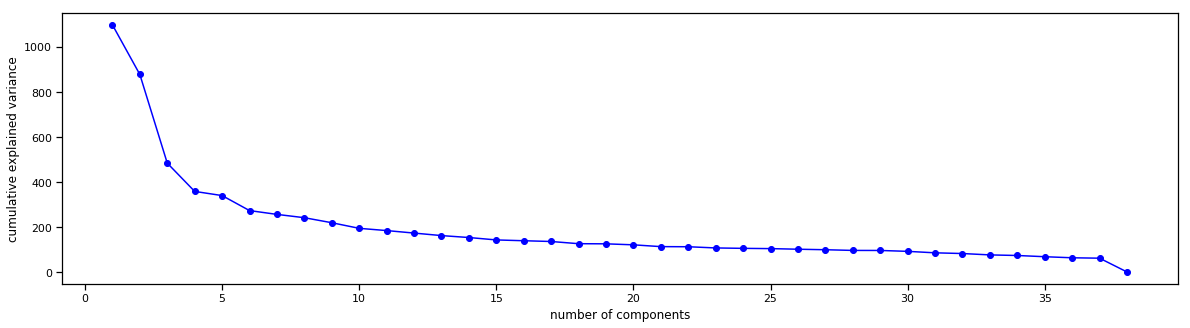

In [188]:
plt.figure(figsize=(20,5))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.plot(range(1,39),pca_model.explained_variance_,'b-o')


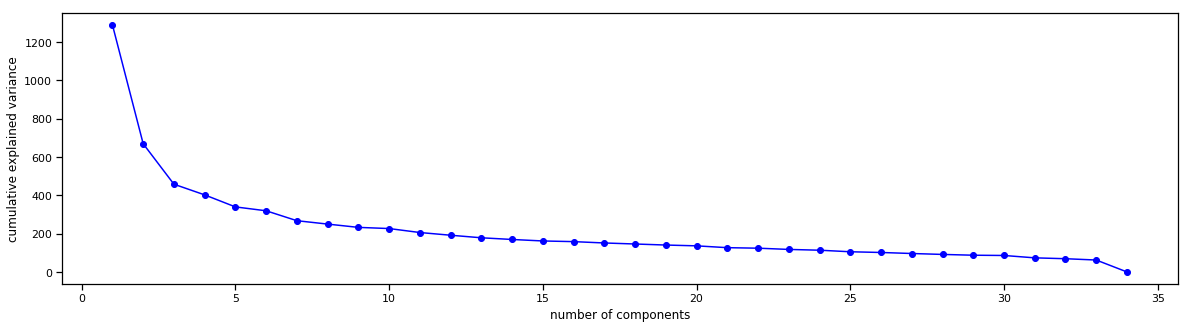

In [189]:
plt.figure(figsize=(20,5))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.plot(range(1,35),pca_model2.explained_variance_,'b-o')

for the training data, the plot begins to flatten out at around 4-6, so I would keep 4-6 principal components whose variances are greater than one.
For the test data, the plot begins to flatten out at 2-5, so I would keep 2-5 components whose variances are greater than one because the plot begins to flatten out at 2. 

## 2.4 Visualize your data in the reduced component space. What can you see from the visualization? (6 pts.)

[]

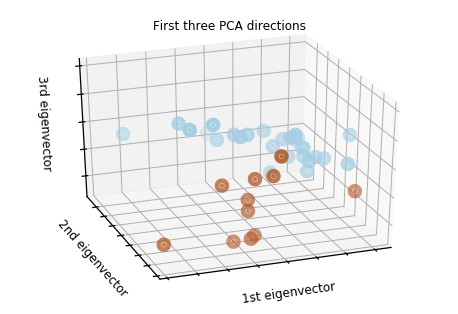

In [146]:
### YOUR CODE HERE ###
df_t2['cat'] = list(pd.read_csv('./data/actual.csv')[:38]['cancer'])
dic = {'ALL':0,'AML':1}
df_t2.replace(dic,inplace=True)
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=3)
X_reduced = sklearn_pca.fit_transform(df_t2)
Y=df_t2['cat']
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,cmap=plt.cm.Paired,linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

[]

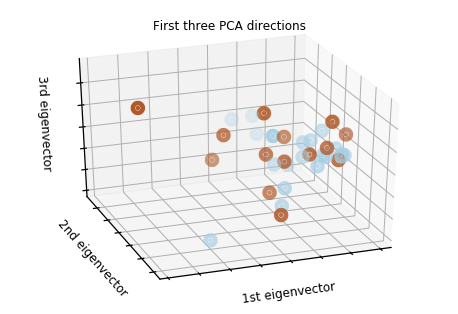

In [147]:
dftest['cat'] = list(pd.read_csv('./data/actual.csv')[38:]['cancer'])
dic = {'ALL':0,'AML':1}
dftest.replace(dic,inplace=True)
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=3)
X_reduced = sklearn_pca.fit_transform(dftest)
Y=dftest['cat']
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,cmap=plt.cm.Paired,linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

Using 3D visualization, In the training dataset  we can see a difference in the distribution of clusters of the different cancer types: ALL and ALM. 
In the test dataset, we can see that the two cancer types have a more similar distribution of clusters. 


# Part 3: Exploratory Factor Analysis

## 3.1. Create factor model with two factors and compare it to your PCA results. What are the similarities and differences? (10 pts.)

In [149]:
### YOUR CODE HERE ###
fa_model = skd.FactorAnalysis(n_components=3) \
              .fit(df_t2.ix[:,:])

# Show the loadings
df_loadings = pd.DataFrame(fa_model.components_[:2,:].T, 
                   index=df_t2.columns,
                   columns=['Factor1', 'Factor2'])
df_loadings.head()


,Factor1,Factor2
Gene Accession Number,,
AFFX-BioB-5_at,-0.425927,-0.049192
AFFX-BioB-M_at,-0.215892,-0.150715
AFFX-BioB-3_at,0.068576,-0.080746
AFFX-BioC-5_at,0.294820,0.189488
AFFX-BioC-3_at,-0.647183,0.138862


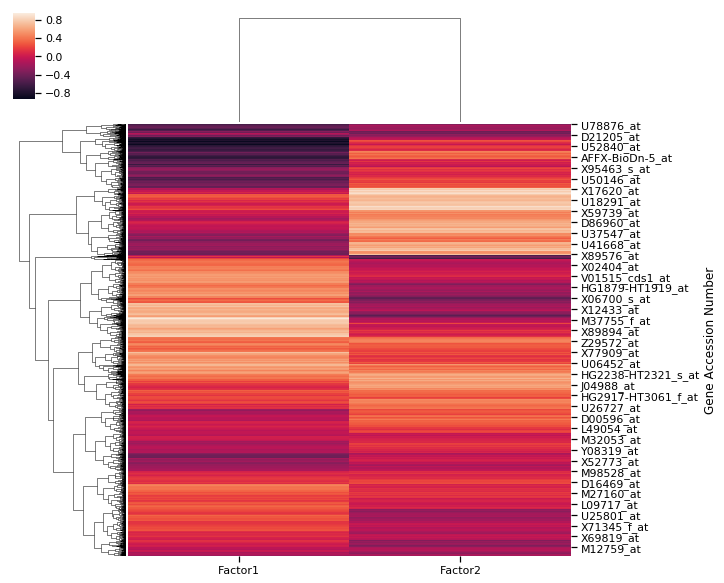

In [150]:
sns.clustermap(df_loadings)

In [160]:
### YOUR CODE HERE ###
fa_model3 = skd.FactorAnalysis(n_components=2) \
              .fit(dftest.ix[:,:])

# Show the loadings
df_loadings3 = pd.DataFrame(fa_model3.components_[:2,:].T, 
                   index=dftest.columns,
                   columns=['Factor1', 'Factor2'])
df_loadings3.head()



,Factor1,Factor2
Gene Accession Number,,
AFFX-BioB-5_at,-0.286492,0.000566
AFFX-BioB-M_at,-0.750434,0.081860
AFFX-BioB-3_at,-0.337845,-0.005185
AFFX-BioC-5_at,0.418690,0.017350
AFFX-BioC-3_at,-0.763735,0.068895


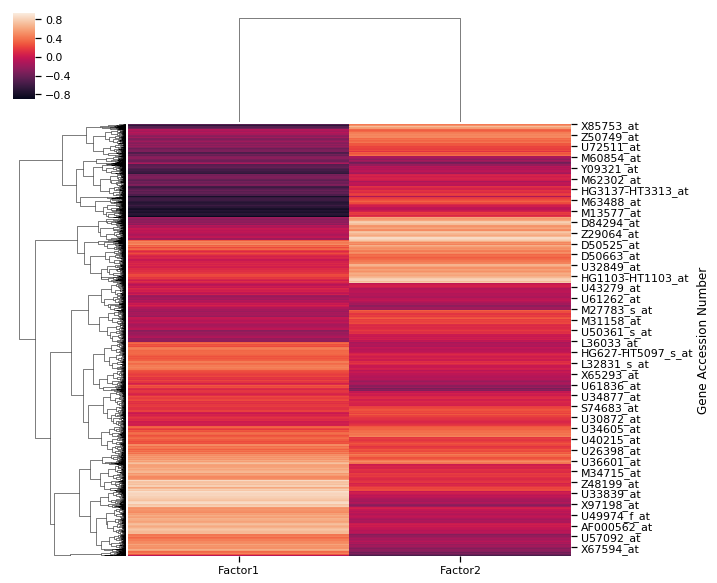

In [162]:
sns.clustermap(df_loadings3)

(YOUR INTERPRETATION HERE)
The factor analysis model helps visualize the data in a more easy to understand way. It enables us visualize genes and their nature of clustering. We can visualize relationships between groups withing the factors. 
After running a two factor model for the training dataset, we can see the df_loadings for factor 1 captures more negative values in comparison to Factor2. The pca results for the training dataset had higher positive values compared to factor analysis.
After running a two factor model on the test dataset, we can see that the df_loadings for factor1 also captures more negative in comparison to Factor2. Towards the bottom half, the heatmap shows a more positive values in Factor 1 compared to factor2. 

## 3.2. Create another factor model with an additional factor and compare it to the first. What might the factors represent? (10 pts.)

In [151]:
### YOUR CODE HERE ###
### YOUR CODE HERE ###
fa_model2 = skd.FactorAnalysis(n_components=3) \
              .fit(df_t2.ix[:,:])

# Show the loadings
df_loadings2 = pd.DataFrame(fa_model2.components_[:3,:].T, 
                   index=df_t2.columns,
                   columns=['Factor1', 'Factor2', 'Factor3'])
df_loadings2.head()

,Factor1,Factor2,Factor3
Gene Accession Number,,,
AFFX-BioB-5_at,-0.425927,-0.049192,0.145005
AFFX-BioB-M_at,-0.215892,-0.150715,0.155180
AFFX-BioB-3_at,0.068576,-0.080746,0.035111
AFFX-BioC-5_at,0.294820,0.189488,0.634778
AFFX-BioC-3_at,-0.647183,0.138862,0.361736


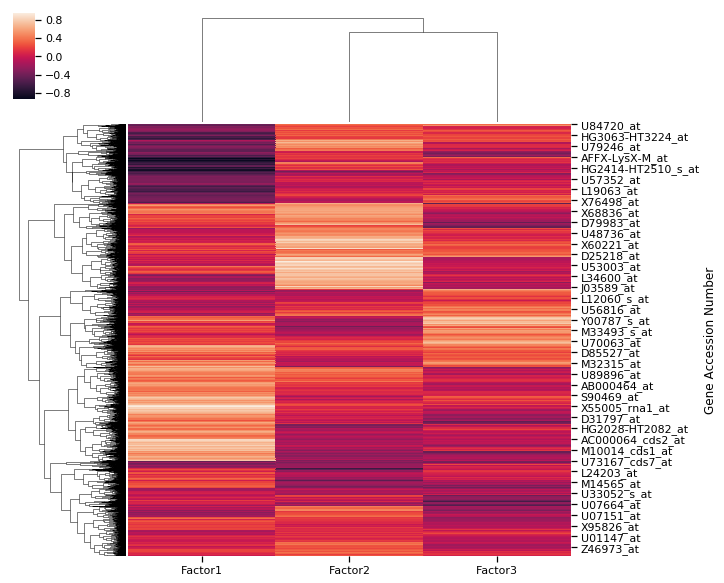

In [152]:
sns.clustermap(df_loadings2)

In [161]:
### YOUR CODE HERE ###
fa_model4 = skd.FactorAnalysis(n_components=3) \
              .fit(dftest.ix[:,:])

# Show the loadings
df_loadings4 = pd.DataFrame(fa_model4.components_[:3,:].T, 
                   index=dftest.columns,
                   columns=['Factor1', 'Factor2', 'Factor3'])
df_loadings4.head()



,Factor1,Factor2,Factor3
Gene Accession Number,,,
AFFX-BioB-5_at,-0.283945,0.016903,0.315207
AFFX-BioB-M_at,-0.753346,0.080496,-0.068702
AFFX-BioB-3_at,-0.340611,0.005723,0.248034
AFFX-BioC-5_at,0.419257,0.018732,-0.012400
AFFX-BioC-3_at,-0.762555,0.079910,0.146551


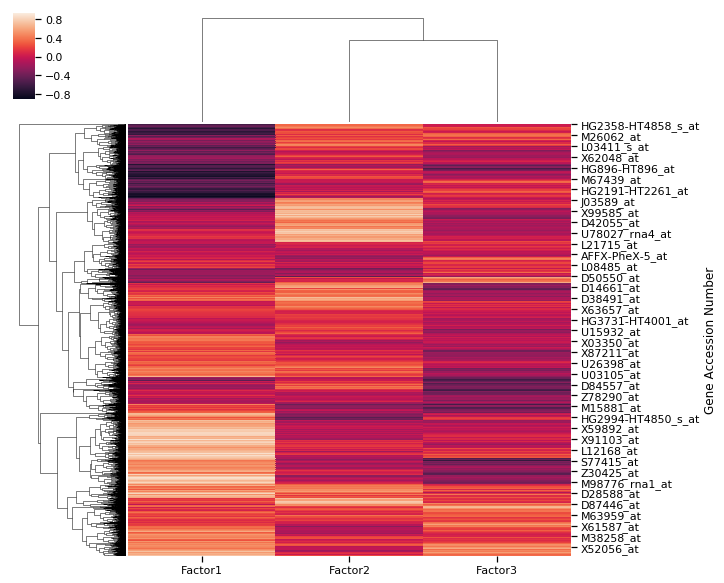

In [163]:
sns.clustermap(df_loadings4)

(YOUR INTERPRETATION HERE)


It is possible that the factors represent the groups of genes that are active, inactive or neutrally expressed in the cells of these tumors. The factors represent groupings of the genes. Genes that are similarly expressed will have more similarity to each other and to the factor within which they are grouped. 

After running the 3 Factor moedel on the training dataset we can see that Factor2 captures more positive values, in the top left corner we can see that the values are less positive in factor 1. Factor2 has a range of positive and negative values as well.
After running the 3 Factor moedel on the test dataset we can see that the loadings in the top left corner of factor1 are less positive compared to that of Factor 2 and Factor3. Towards the bottom of factor1 we see more positive values compared to the other two factors. Factor2 captures a mix of high and low positive values. 


# Part 4: Clustering

## 4.1. Perform a cluster analysis on your data. Visualize the results in 2D or 3D using PCA. (10 pts.)

- Apply dimension reduction on the data (5 pts.)
- Choose your clustering algorithm and tune the parameter (5 pts.)

In [165]:
### YOUR CODE HERE ###
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df_t2.drop('cat',axis=1))

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std)


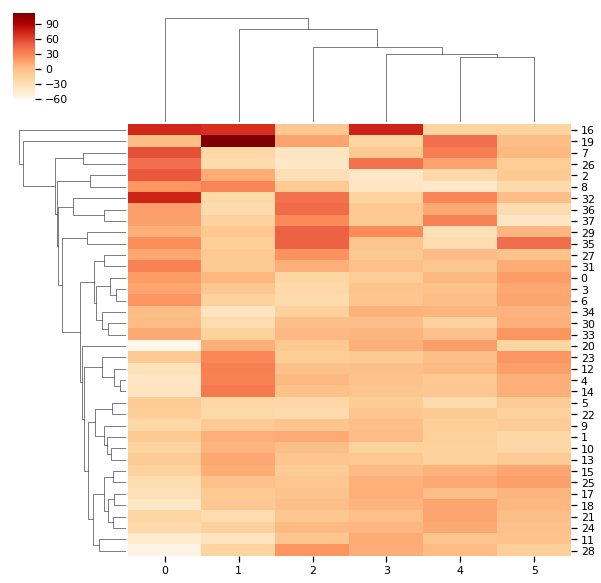

In [166]:
sns.clustermap(Y_sklearn,cmap=plt.cm.OrRd)

In [167]:
from sklearn.preprocessing import StandardScaler
X_std2 = StandardScaler().fit_transform(dftest.drop('cat',axis=1))

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca2 = sklearnPCA(n_components=6)
Y_sklearn2 = sklearn_pca2.fit_transform(X_std2)

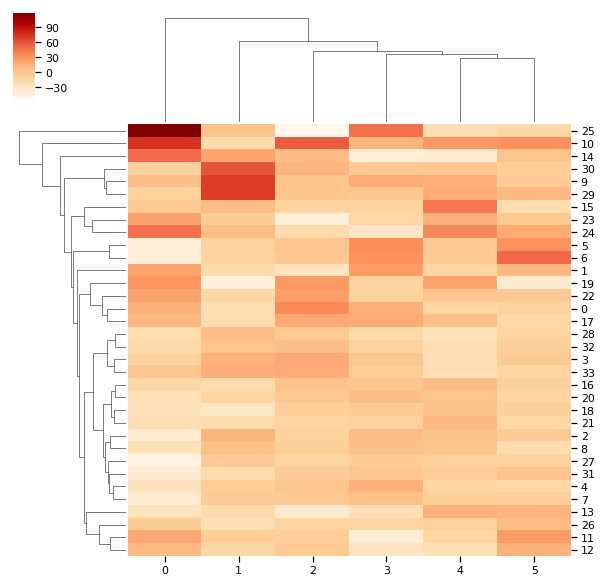

In [168]:
sns.clustermap(Y_sklearn2,cmap=plt.cm.OrRd)

(YOUR INTERPRETATION HERE)

After transforming the results of the loadings from the PCA for the training data set, we can see that the first component captures higher positive values for each row compared to the other components. The sixth component captures lower positive for each row compared to the other componenets. 

After transforming the results of the loadings from the PCA for the test data set, we can see that the first component also captures higher positive values for each row compared to the other components. The second component also captures a few positive values but not as high as the first componenet.The sixth component captures lower positive values for each row compared to the other componenets.

## Silhouette method

(1, 9.35)

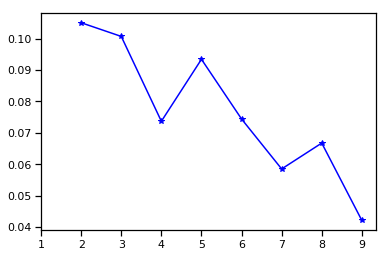

In [182]:
from sklearn import metrics
list1 = []
for k in range(2,10):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(dftest)
    list1.append(metrics.silhouette_score(dftest, k_means.labels_))

fig, ax = plt.subplots()
plt.plot(range(2,10), list1, 'b*-')
plt.xlim(1, plt.xlim()[1])

## Rule of thumb

In [180]:
n_samples, n_features = dftest.shape
print(n_samples, n_features)

34 7130


In [181]:
from sklearn import metrics
import math
math.sqrt(n_samples/2)

4.123105625617661

## Elbow method

(1, 13.55)

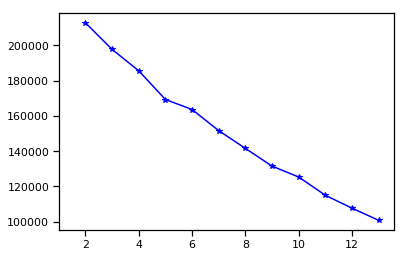

In [184]:
from sklearn.cluster import KMeans

cost = []
for k in range(2,14):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(dftest)
    cost.append(k_means.inertia_)
    
fig, ax = plt.subplots()
plt.plot(range(2,14), cost, 'b*-')
plt.xlim(1, plt.xlim()[1])

### Since the elbow and silhouette method show a total of 4 clusters we would use that in our anlysis 

In [190]:
pca_model2 = skd.PCA().fit(dftest.ix[:,:])
pca_model2.components_.shape

(34, 7130)

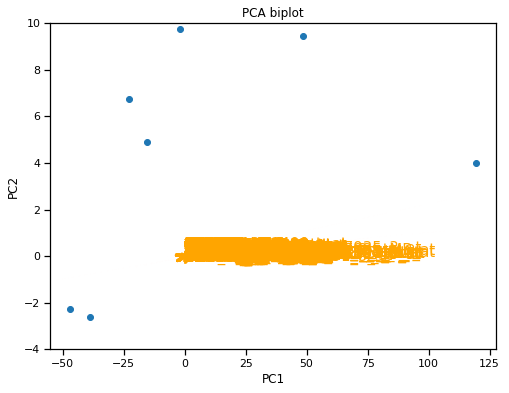

In [194]:
# Scatterplot of disaggregated data
X = pca_model2.transform(dftest.iloc[:,:])
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA biplot')
plt.ylim(-4, 10)

# Add variable unit vector projections
V = pca_model.transform(np.identity(7129))
for i, v in enumerate(V):
    plt.annotate(dftest.columns[i], 
                 xy=(0,0), xytext=v[:2]*10, 
                 fontsize=15, color='orange',
                 arrowprops=dict(
                    arrowstyle='<-', linewidth=2, color='orange'))

## 4.2. Which clusters can you identify? What does your cluster analysis tell you about the data? (10 pts.)
- Visualize your results with the test data(5 pts.)
- Interprete your results (5 pts.)

In [170]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
digits = load_digits()
data = scale(digits.data)

n_digits = len(np.unique(digits.target))



In [173]:
from sklearn.cluster import KMeans
k_means = KMeans(init='k-means++', n_clusters=2, n_init=10)
k_means.fit(X[:,:2])

k_means.labels_
# k_means = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
# k_means.fit(data)
# kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)

# reduced_data = PCA(n_components=2).fit_transform(data)

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [197]:
import sklearn.preprocessing as skp
dftest.ix[:,:] = skp.scale(dftest.ix[:,:].astype(np.float)) #make sure all the values are floats
dftest.index = pd.to_numeric(dftest.index)
dftest = dftest.sort_index(ascending = True)
dftest.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,cat
39,-2.844380,-0.257223,0.306000,1.238686,0.025884,-0.523312,-1.667952,-1.049687,0.856798,-0.936277,...,1.556109,1.104685,-0.613631,-1.506468,1.001512,1.050378,0.909252,-0.394315,-0.784861,-0.83666
40,0.249432,-0.680824,2.043929,0.923680,0.010308,-0.960346,1.338615,-2.535584,1.481976,0.327970,...,-0.164410,-2.826066,-0.043162,-0.316934,-1.568936,-0.026902,-0.587509,-0.819890,0.229552,-0.83666
41,0.552747,1.304804,-0.071469,-0.536801,-0.044209,0.423596,-0.230796,0.761249,-0.777441,-0.630544,...,-0.672903,0.876658,-1.068353,1.117503,-1.114577,-0.529972,1.574480,-0.538290,0.291659,-0.83666
42,1.571885,0.157552,0.117265,0.742313,0.127130,0.648735,0.421656,0.352627,-0.645824,1.724427,...,-0.617178,0.550906,0.808408,1.274941,0.539495,0.145869,0.133154,3.423164,-0.205196,-0.83666
43,2.348371,1.190079,-1.125237,0.513218,0.205011,-0.238577,-0.974355,-0.167436,-1.303907,-2.274892,...,-1.689890,-0.534937,1.044037,-0.054537,1.412478,-1.317606,0.151633,2.521197,-1.012586,-0.83666


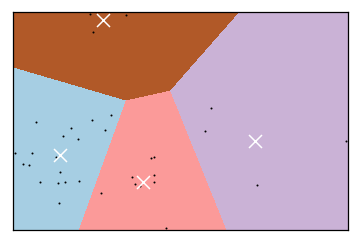

In [198]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(dftest)
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02
# point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Using the test data, I used 4 clusters based on the results from number of clusters gotten in the previous question.